In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/asp-/Desktop/all folders/prices.csv')

In [3]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
df.shape

(851264, 7)

In [5]:
df1= df[df['symbol']=='YHOO']
df1 = df1.close.values.astype('float32')
df1 = df1.reshape(1762, 1)
df1.shape

(1762, 1)

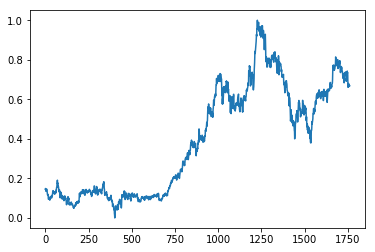

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.plot(df1)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
df1= scaler.fit_transform(df1)

In [9]:
train_size=int(len(df1)*0.80)
test_size=len(df1)-train_size
train, test = df1[0:train_size,:], df1[train_size:len(df1),:]
print(len(train), len(test))

1409 353


In [10]:
train_size, test_size

(1409, 353)

In [11]:
import numpy as np
def create_dataset(dataset,time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [12]:
time_step=1
X_train, Y_train= create_dataset(train,time_step)
X_test, Y_test= create_dataset(test,time_step)

In [13]:
print(X_train)

[[0.14559112]
 [0.14874034]
 [0.14728685]
 ...
 [0.6201551 ]
 [0.6305718 ]
 [0.633721  ]]


In [14]:
print(Y_train)

[0.14874034 0.14728685 0.1359012  ... 0.6305718  0.633721   0.6145834 ]


In [15]:
print(X_train.shape), print(Y_train.shape)

(1407, 1)
(1407,)


(None, None)

In [16]:
print(X_test.shape), print(Y_test.shape)

(351, 1)
(351,)


(None, None)

In [17]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [18]:
conda -ignore-installed --user 


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: the following arguments are required: command


In [19]:
#LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import time


In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(1,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

start = time.time()
model.compile(loss='mean_squared_error',optimizer='adam')
print ('compilation time : ', time.time() - start)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
compilation time :  0.039971113204956055


In [21]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=128,verbose=0.05)

Train on 1407 samples, validate on 351 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [22]:
import tensorflow as tf

In [23]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
len(test)

353

In [26]:
x_input=test[352].reshape(1,-1)

In [27]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [28]:
temp_input

[0.6681202054023743]

In [29]:
len(df1)

1762

In [36]:
from numpy import array
lst_output=[]
n_steps=1
i=0
while(i<1):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("() day input ()".format(1,x_input))
        x_input=x_input.reshape((1,-1))
        x_input=x_input.reshape((1,n_steps,1))
        y=model.predict(x_input,verbose=0)
        print("() day output ()".format(i,y))
        temp_input.extend(y[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(y.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        y=model.predict(x_input,verbose=0)
        print(y[0])
        temp_input.extend(y[0].tolist())
        print(len(temp_input))
        lst_output.extend(y.tolist())
        i=i+1
print(lst_output)

[0.6509717]
32
[[0.6509717106819153]]


In [37]:
day_new=np.arange(1,2)
day_pred=np.arange(2,350)

In [38]:
import matplotlib.pyplot as plt

In [39]:
len(df1)

1762

In [40]:
df3=df1.tolist()
df3.extend(lst_output)

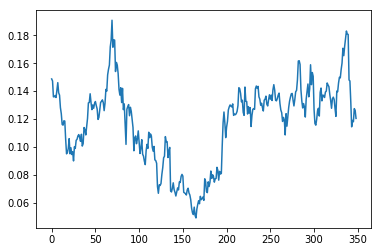

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1:350])